# LHC Filling Scheme from LPC data

Info on the filling scheme for a fill
- get filling scheme from LPC web page
- decode filling scheme with various functions
- do some plots

In [1]:
import LHCTools as ltools
from LHCTools import LPC_FillingScheme

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib notebook
%matplotlib inline

In [2]:
fno = 6868

## LHC Filling Scheme info from LPC web

In [29]:
ltools.my_cool_test_method()

LHCTools - It works!


In [3]:
lpcfscheme = LPC_FillingScheme.LPCFillingScheme(fno)

In [4]:
injSchemeDF = lpcfscheme.injectionsDF
injSchemeDF.head()

,inj Nbr,Ring,RF Bucket,Bu Spac (ns),bu per PS batch,SPS Batch spac,PSbatch nbr
idx,,,,,,,
1,1,ring_1,121,525,4,2100,4
2,1,ring_2,121,525,4,2100,4
3,2,ring_1,3621,525,4,2100,2
4,2,ring_2,5381,525,4,2100,2
5,3,ring_1,7171,525,4,2100,2


In [7]:
lpcfscheme.fsprint()

>>>>> LPC Filling scheme for fil 6868
name ______________________________ 525ns_140b_124_32_23_16bpi_11inj
csv blocs _________________________ 14
injections (both beams) ___________ 22
bunches ___________________________ {'B1': {'probe': 0, 'Nominal': 140}, 'B2': {'probe': 0, 'Nominal': 140}}
collisions ________________________ 
  Tot number of B1 injections _____ 11
  Tot number of B2 injections _____ 11
  Collisions at IP1&5______________ 124
  B1-empty at IP1&5________________ 16
  B2-empty at IP1&5________________ 16
  Empty-empty at IP1&5_____________ 3408
  Collisions at IP2________________ 32
  B1-empty at IP2__________________ 108
  B2-empty at IP2__________________ 108
  Empty-empty at IP2_______________ 3316
  Collisions at IP8________________ 23
  B1-empty at IP8__________________ 117
  B2-empty at IP8__________________ 117
  Empty-empty at IP8_______________ 3307
long ranges (2 beams, all IPs) ____ 630
long ranges (2 beams) _____________ 280
head on (2 beams) ______________

In [14]:
lrcolldf = lpcfscheme.longrangeDF
lrcolldf.head()

,RFbucketbeam1,RFbucketbeam2,z-pos/m,ip
0,121,121,0.0,IP1
1,331,331,0.0,IP1
2,541,541,0.0,IP1
3,751,751,0.0,IP1
4,961,961,0.0,IP1


In [15]:
lrcollbeam = lpcfscheme.lrbeamDF
lrcollbeam[lrcollbeam['beam'] == 'B1'].head()

,RFbucket,Slot,Head-On IP1,Head-On IP2,Head-On IP5,Head-On IP8,Head-On Tot,LR IP1,LR IP2,LR IP5,LR IP8,LR Tot,beam
0,121,12,1,0,1,0,2,0,2,0,0,2,B1
1,331,33,1,0,1,0,2,0,2,0,0,2,B1
2,541,54,1,0,1,0,2,0,2,0,0,2,B1
3,751,75,1,0,1,0,2,0,2,0,0,2,B1
4,961,96,1,0,1,0,2,0,2,0,0,2,B1


In [16]:
hobeam = lpcfscheme.hobeamDF
hobeam[hobeam['beam'] == 'B2'].head()

,bucket number,IP1,IP2,IP5,IP8,beam
0,121,121,26851,121,-,B2
1,331,331,27061,331,-,B2
2,541,541,27271,541,-,B2
3,751,751,27481,751,-,B2
4,961,961,27691,961,-,B2


## Do some plots

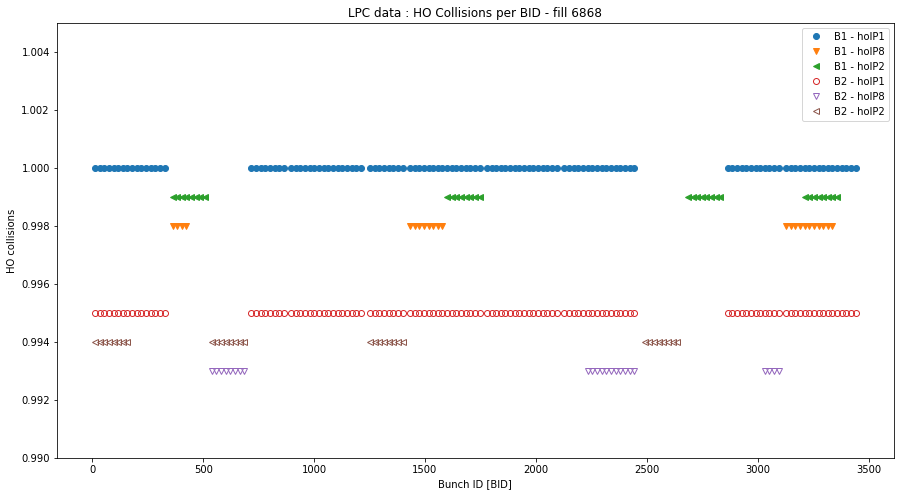

In [21]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

_tmp0 = lpcfscheme.lrbeamDF[['beam','Slot','Head-On IP1','Head-On IP2','Head-On IP8']].copy()

_tmp = _tmp0[_tmp0['beam'] == 'B1'].copy()
_tmp['hoip1s'] = _tmp['Head-On IP1']*1.000
_tmp['hoip2s'] = _tmp['Head-On IP2']*0.999
_tmp['hoip8s'] = _tmp['Head-On IP8']*0.998
_tmp.plot(x='Slot',y='hoip1s', label='B1 - hoIP1', marker='o', style='o', ax=ax)
_tmp.plot(x='Slot',y='hoip8s', label='B1 - hoIP8', marker='v', style='o', ax=ax)
_tmp.plot(x='Slot',y='hoip2s', label='B1 - hoIP2', marker='<', style='o', ax=ax)

_tmp = _tmp0[_tmp0['beam'] == 'B2'].copy()
_tmp['hoip1s'] = _tmp['Head-On IP1']*0.995
_tmp['hoip2s'] = _tmp['Head-On IP2']*0.994
_tmp['hoip8s'] = _tmp['Head-On IP8']*0.993
_tmp.plot(x='Slot',y='hoip1s', label='B2 - hoIP1', marker='o', fillstyle='none', style='o', ax=ax)
_tmp.plot(x='Slot',y='hoip8s', label='B2 - hoIP8', marker='v', fillstyle='none', style='o', ax=ax)
_tmp.plot(x='Slot',y='hoip2s', label='B2 - hoIP2', marker='<', fillstyle='none', style='o', ax=ax)

plt.ylim(0.99,1.005)
plt.xlabel('Bunch ID [BID]')
plt.ylabel('HO collisions')
plt.title('LPC data : HO Collisions per BID - fill {}'.format(fno))
plt.legend()

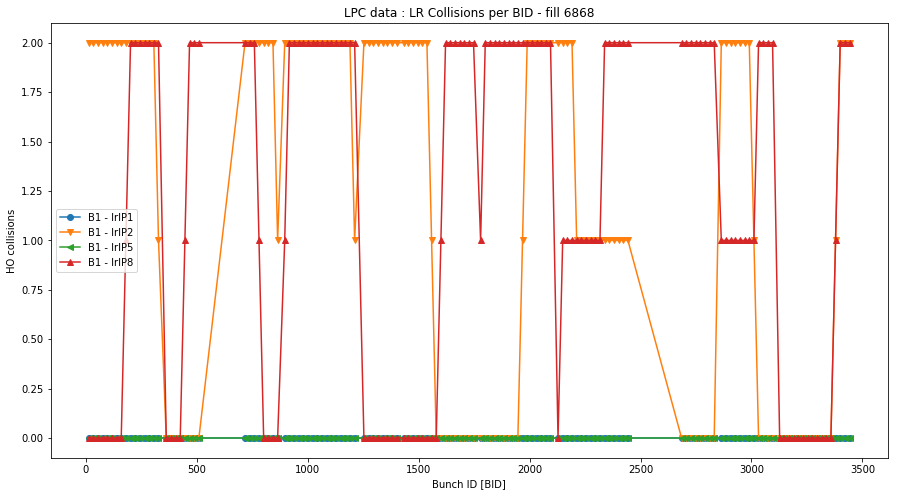

In [22]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
_tmp = lpcfscheme.lrbeamDF[lpcfscheme.lrbeamDF['beam']== 'B1']
_tmp.plot(x='Slot', y='LR IP1', label='B1 - lrIP1', marker='o', style='-', ax=ax)
_tmp.plot(x='Slot', y='LR IP2', label='B1 - lrIP2', marker='v', style='-', ax=ax)
_tmp.plot(x='Slot', y='LR IP5', label='B1 - lrIP5', marker='<', style='-', ax=ax)
_tmp.plot(x='Slot', y='LR IP8', label='B1 - lrIP8', marker='^', style='-', ax=ax)

# plt.ylim(0.99,1.005)
plt.xlabel('Bunch ID [BID]')
plt.ylabel('HO collisions')
plt.title('LPC data : LR Collisions per BID - fill {}'.format(fno))
plt.legend()

In [25]:
_tmp = lpcfscheme.lrbeamDF
_tmp[(_tmp['Head-On IP1'] == 1) & (_tmp['beam'] == 'B1')].shape
rfbuck_coll_ip1 = _tmp[(_tmp['Head-On IP1'] == 1) & (_tmp['beam'] == 'B1')]['RFbucket'].values
rfbuck_coll_ip1

array([  121,   331,   541,   751,   961,  1171,  1381,  1591,  1801,
        2011,  2221,  2431,  2641,  2851,  3061,  3271,  7171,  7381,
        7591,  7801,  8011,  8221,  8431,  8641,  8961,  9171,  9381,
        9591,  9801, 10011, 10221, 10431, 10641, 10851, 11061, 11271,
       11481, 11691, 11901, 12111, 12531, 12741, 12951, 13161, 13371,
       13581, 13791, 14001, 14321, 14531, 14741, 14951, 15161, 15371,
       15581, 15791, 16001, 16211, 16421, 16631, 16841, 17051, 17261,
       17471, 17791, 18001, 18211, 18421, 18631, 18841, 19051, 19261,
       19471, 19681, 19891, 20101, 20311, 20521, 20731, 20941, 21281,
       21491, 21701, 21911, 22121, 22331, 22541, 22751, 22961, 23171,
       23381, 23591, 23801, 24011, 24221, 24431, 28641, 28851, 29061,
       29271, 29481, 29691, 29901, 30111, 30321, 30531, 30741, 30951,
       31271, 31481, 31691, 31901, 32111, 32321, 32531, 32741, 32951,
       33161, 33371, 33581, 33791, 34001, 34211, 34421])

In [26]:
_tmp = lpcfscheme.longrangeDF
lrdf = _tmp[_tmp['RFbucketbeam1'].isin(rfbuck_coll_ip1)]
xx = lrdf.groupby(['ip','z-pos/m']).count()
xx.head()

RFbucketbeam1  RFbucketbeam2
ip  z-pos/m                              
IP1  0.00              124            124
IP2 -59.89              14             14
    -41.18               8              8
    -37.43               3              3
    -29.95              29             29

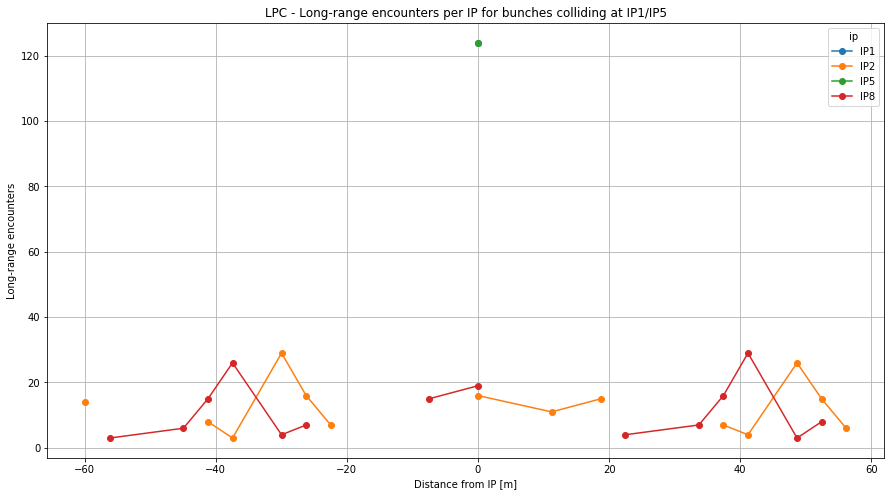

In [27]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
lrdf.groupby(['z-pos/m','ip']).count()['RFbucketbeam1'].unstack().plot(marker='o',ax=ax)
plt.ylabel('Long-range encounters')
plt.xlabel('Distance from IP [m]')
plt.title('LPC - Long-range encounters per IP for bunches colliding at IP1/IP5'.format(fno))
plt.grid()
plt.show()